# Asp7 Example - Advanced Usage

In this tutorial we will use example data from a molecular dynamics simulation and learn more about advanced usage of EncoderMap. Encoder map can create a low-dimensional maps of the vast conformational space of molecules. This allows easy identification of the most common molecular conformations and helps to understand the relations between these conformations. In this example we will use data from a simulation of simple peptide: hepta-aspartic-acid.

First we need to import some libraries:

In [1]:
import encodermap as em
import matplotlib.pyplot as plt
import numpy as np
from math import pi
%config Completer.use_jedi=False

Next, we need to load the input data. Different kinds of variables can be used to describe molecular conformations: e.g. Cartesian coordinates, distances, angles, dihedrals... In principle EncoderMap can deal with any of these inputs, however, some are better suited than others. The molecular conformation does not change when the molecule is translated or rotated. The chosen input variables should reflect that and be translationally and rotationally invariant. 

In this example we use the backbone dihedral angles phi and psi as input as they are translationally and rotationally invariant and describe the backbone of a protein/peptide very well.

The "asp7.csv" contains one column for each dihedral and one row for each frame of the trajectory. Additionally the last column contains a cluster_id from a gromos clustering which we can later use for comparison. We can load this data using numpy.loadtxt:

In [2]:
csv_path = "asp7.csv"
data = np.loadtxt(csv_path, skiprows=1, delimiter=",")
dihedrals = data[:, :-1]
cluster_ids = data[:, -1]

Similar to the previous example we need to set some parameters. In contrast to the Cube example we no have periodic input data. The dihedral angles are in radians with a 2pi periodicity.

<IPython.core.display.Javascript object>


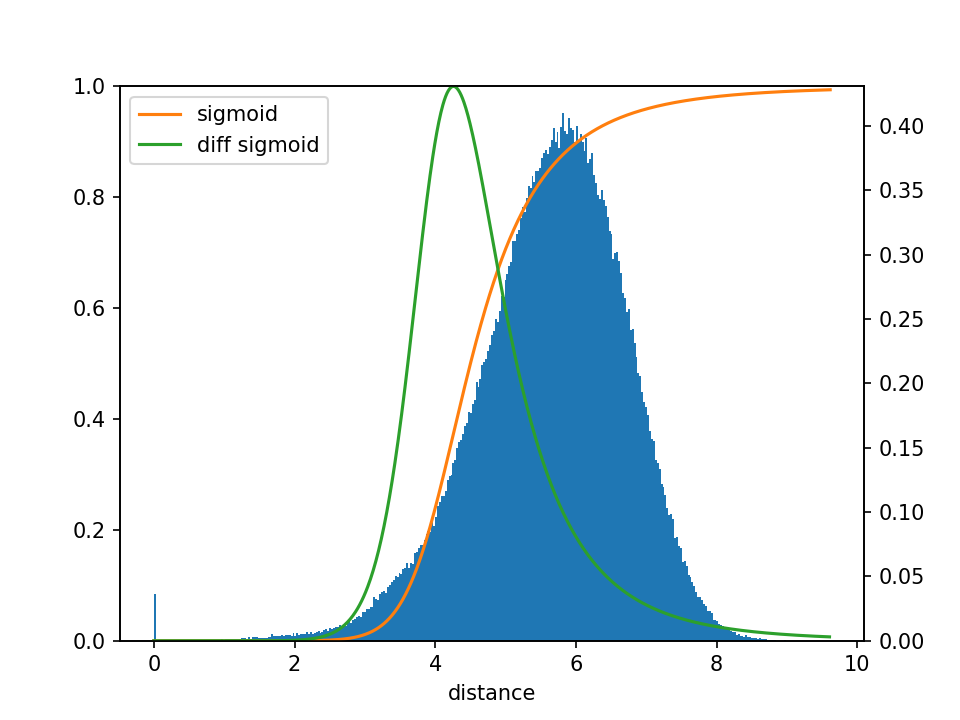

In [3]:
parameters = em.Parameters()
parameters.main_path = em.misc.run_path("runs/asp7")
parameters.n_steps = 100
parameters.summary_step = max(1, parameters.n_steps/100)
parameters.periodicity = 2*pi
parameters.n_neurons = [3, 3, 2]
parameters.dist_sig_parameters = (4.5, 12, 6, 1, 2, 6)

%matplotlib notebook
em.plot.distance_histogram(dihedrals[::10], 
                           parameters.periodicity, 
                           parameters.dist_sig_parameters[0:3])

In [4]:
e_map = em.EncoderMap(parameters, dihedrals)
e_map.train()

Output files are saved to runs/asp7/run0 as defined in 'main_path' in the parameters.
Instructions for updating:
Colocations handled automatically by placer.

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.


100%|██████████| 100/100 [00:00<00:00, 144.08it/s]


In [ ]:
e_map.train_writer.flush()

In [ ]:
low_d_projection = e_map.encode(dihedrals)

In [ ]:

fig, axe = plt.subplots()
axe.plot(low_d_projection[:, 0], low_d_projection[:, 1], linestyle="", marker=".",
         markersize=5, color="0.7", alpha=0.1)
for i in range(9):
    mask = cluster_ids == i + 1
    axe.plot(low_d_projection[:, 0][mask], low_d_projection[:, 1][mask], label=str(i),
             linestyle="", marker=".", markersize=5, alpha=0.3)
legend = axe.legend()
for lh in legend.legendHandles:
    lh._legmarker.set_alpha(1)

In [ ]:
%matplotlib notebook
fig, axe = plt.subplots()
axe.plot(low_d_projection[:, 0], low_d_projection[:, 1], linestyle="", marker=".",
         markersize=5, color="0.7", alpha=0.1)
for i in range(9):
    mask = cluster_ids == i + 1
    axe.plot(low_d_projection[:, 0][mask], low_d_projection[:, 1][mask], label=str(i),
             linestyle="", marker=".", markersize=5, alpha=0.3)
legend = axe.legend()
for lh in legend.legendHandles:
    lh._legmarker.set_alpha(1)


pdb_path = "asp7.pdb"
generator = em.plot.PathGenerateDihedrals(axe, e_map, pdb_path)

In [ ]:
import nglview
import MDAnalysis as md

uni = md.Universe("runs/asp7/run9/generated_paths/2019-03-15_15-31-10/generated.pdb")

view = nglview.show_mdanalysis(uni)

# clear representations
view.clear_representations()
view.add_licorice(selection="backbone")

view